In [ ]:
# i wonder if theres gonna b any diff in exgtrapolation if i feed in the input as 2 feature vectors instead of 1... then attn will do work
#however attn shud saturate out at 0 and 1 for softmax in extreme inputs... meaning the vector we output as c1 v1+ c2 v2 shud approach a constant... 
# lets see if this is true

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-5,5,20)
x_matrix, y_matrix = torch.meshgrid(x,x)
print(y_matrix.shape)

x_flat, y_flat = x_matrix.flatten(), y_matrix.flatten()

#i want (400,2,1), not 1,2 like yesterday
input_data = (torch.vstack((x_flat,y_flat)).T).unsqueeze(2)
print(input_data.shape)

output_data = (input_data[:,0,:]**2+input_data[:,1,:]**2).unsqueeze(2)
print(output_data.shape)

dataset = torch.utils.data.TensorDataset(input_data,output_data)
loader = torch.utils.data.DataLoader(dataset, batch_size=4)


In [ ]:
class Transformer(nn.Module):
    def __init__(self,in_d,hidden_d,out_d,n_heads):
        super().__init__()
        self.embed = nn.Linear(in_d,hidden_d)
        self.attn = nn.MultiheadAttention(hidden_d,n_heads, batch_first=True) 
        self.ffn = nn.Sequential(nn.Linear(hidden_d, 4*hidden_d), nn.ReLU(),  nn.Linear(4*hidden_d, hidden_d) )
        self.unembed = nn.Linear(hidden_d,out_d)
        self.norm = nn.LayerNorm(hidden_d)

    def forward(self,x):
        x = self.embed(x)
        x = x + self.attn(x,x,x)[0]
   #     x = self.norm(x)
        x = x+ self.ffn(x)
   #     x= self.norm(x)
        x = x.mean(keepdim=True, dim=1)
        x = self.unembed(x)
        return x

In [ ]:
my_transformer = Transformer(1,16,1,4)
my_optim = torch.optim.Adam(my_transformer.parameters(),lr=4e-4)
loss_fn = nn.MSELoss()

In [ ]:
loss_list=[]
for epoch in range(150):
    for in_batch,out_batch in loader:
        preds = my_transformer(in_batch)
        loss = loss_fn(preds, out_batch)
        loss_list.append(loss.detach())
        loss.backward()
        my_optim.step()
        my_optim.zero_grad()

plt.plot(loss_list)

In [ ]:
my_transformer.eval()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(input_data[:,0,0],input_data[:,1,0],output_data[:,0,0],label="training region")

####
whatevs=20
xx = torch.linspace(-whatevs,whatevs,60)
xx_matrix, yy_matrix = torch.meshgrid(xx,xx)
print(y_matrix.shape)

xx_flat, yy_flat = xx_matrix.flatten(), yy_matrix.flatten()

#i want (400,2,1), not 1,2 like yesterday
iinput_data = (torch.vstack((xx_flat,yy_flat)).T).unsqueeze(2)
print(iinput_data.shape)


ax.scatter(iinput_data[:,0,0],iinput_data[:,1,0],my_transformer(iinput_data).detach().squeeze(),alpha=.2,label="test")
ax.set_title("transformer, without layer_norm, input fed as seq_len=2 (:,2,1)")
ax.legend()

tensor([-5.0000, -4.7368, -4.4737, -4.2105, -3.9474, -3.6842, -3.4211, -3.1579,
        -2.8947, -2.6316, -2.3684, -2.1053, -1.8421, -1.5789, -1.3158, -1.0526,
        -0.7895, -0.5263, -0.2632,  0.0000,  0.0000,  0.2632,  0.5263,  0.7895,
         1.0526,  1.3158,  1.5789,  1.8421,  2.1053,  2.3684,  2.6316,  2.8947,
         3.1579,  3.4211,  3.6842,  3.9474,  4.2105,  4.4737,  4.7368,  5.0000])
torch.Size([40, 40])
torch.Size([1600, 2, 1])
torch.Size([1600, 1, 1])


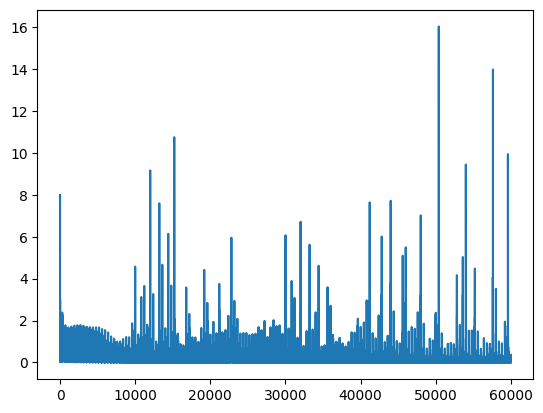

In [ ]:
## what but can it interpolate tho?

plt.close("all")

#x = torch.hstack([torch.linspace(-5,0,12), torch.linspace(3,5,6)])
x = torch.hstack([torch.linspace(-5,0,20), torch.linspace(0,5,20)])
print(x)
x_matrix, y_matrix = torch.meshgrid(x,x)
print(y_matrix.shape)

x_flat, y_flat = x_matrix.flatten(), y_matrix.flatten()

#i want (400,2,1), not 1,2 like yesterday
input_data = (torch.vstack((x_flat,y_flat)).T).unsqueeze(2)
print(input_data.shape)

output_data = torch.sin((torch.abs(input_data[:,0,:])+torch.abs(input_data[:,1,:]))).unsqueeze(2)
print(output_data.shape)

dataset = torch.utils.data.TensorDataset(input_data,output_data)
loader = torch.utils.data.DataLoader(dataset, batch_size=4)

my_transformer = Transformer(1,16,1,4)
my_optim = torch.optim.Adam(my_transformer.parameters(),lr=4e-4)

loss_list=[]
for epoch in range(30):
    for in_batch,out_batch in loader:
        preds = my_transformer(in_batch)
        loss = loss_fn(preds, out_batch)
        loss_list.append(loss.detach())
        loss.backward()
        my_optim.step()
        my_optim.zero_grad()

%matplotlib inline
plt.figure()
plt.plot(loss_list)

torch.Size([40, 40])
torch.Size([3600, 2, 1])


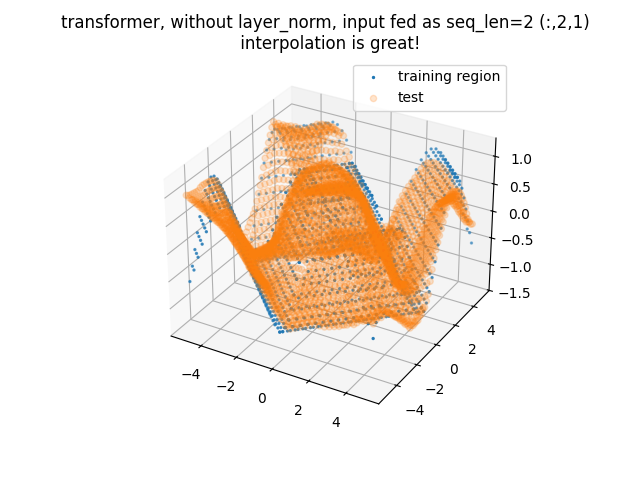

In [40]:
%matplotlib widget
my_transformer.eval()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(input_data[:,0,0],input_data[:,1,0],output_data[:,0,0],label="training region", s=2)

####
whatevs=5
xx = torch.linspace(-whatevs,whatevs,60)
xx_matrix, yy_matrix = torch.meshgrid(xx,xx)
print(y_matrix.shape)

xx_flat, yy_flat = xx_matrix.flatten(), yy_matrix.flatten()

#i want (400,2,1), not 1,2 like yesterday
iinput_data = (torch.vstack((xx_flat,yy_flat)).T).unsqueeze(2)
print(iinput_data.shape)


ax.scatter(iinput_data[:,0,0],iinput_data[:,1,0],my_transformer(iinput_data).detach().squeeze(),alpha=.2,label="test")
ax.set_title("transformer, without layer_norm, input fed as seq_len=2 (:,2,1) \n interpolation is great!")
ax.legend()